#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings                              
warnings.filterwarnings('ignore')

#### Reading the CSV file of House data

In [2]:
df=pd.read_csv('F:/data science course/datasets/multiple reg/kc_house_data.CSV')

#### Printing the first 5 rows of dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes #data type of each column

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.info() #Information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Data Preprocessing

In [6]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [7]:
df.columns  #column names of datasets

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [8]:
df.describe()  #Five number summary of dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


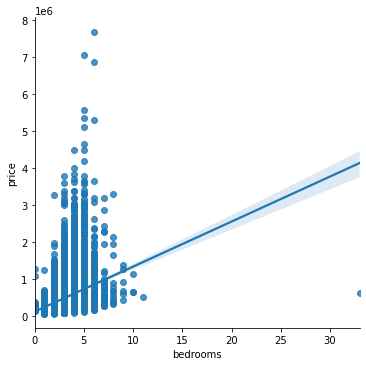

In [10]:
sn.lmplot(x='bedrooms',y='price',data=df)
plt.show()

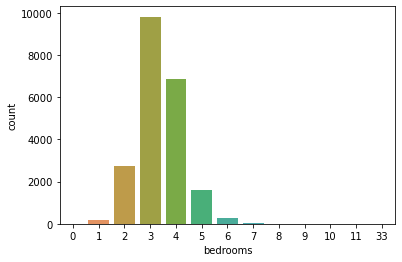

In [11]:
sn.countplot(x='bedrooms',data=df)
plt.show()

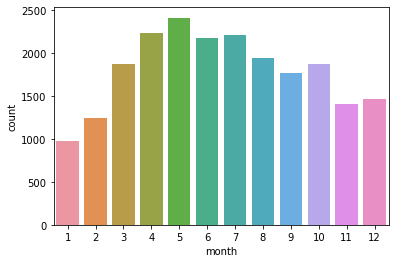

In [12]:
sn.countplot(x='month',data=df)
plt.show()

In [13]:
dscr_columns=[u'bedrooms', u'bathrooms', u'floors', u'waterfront', u'view', u'condition', 'grade', u'month', u'year']

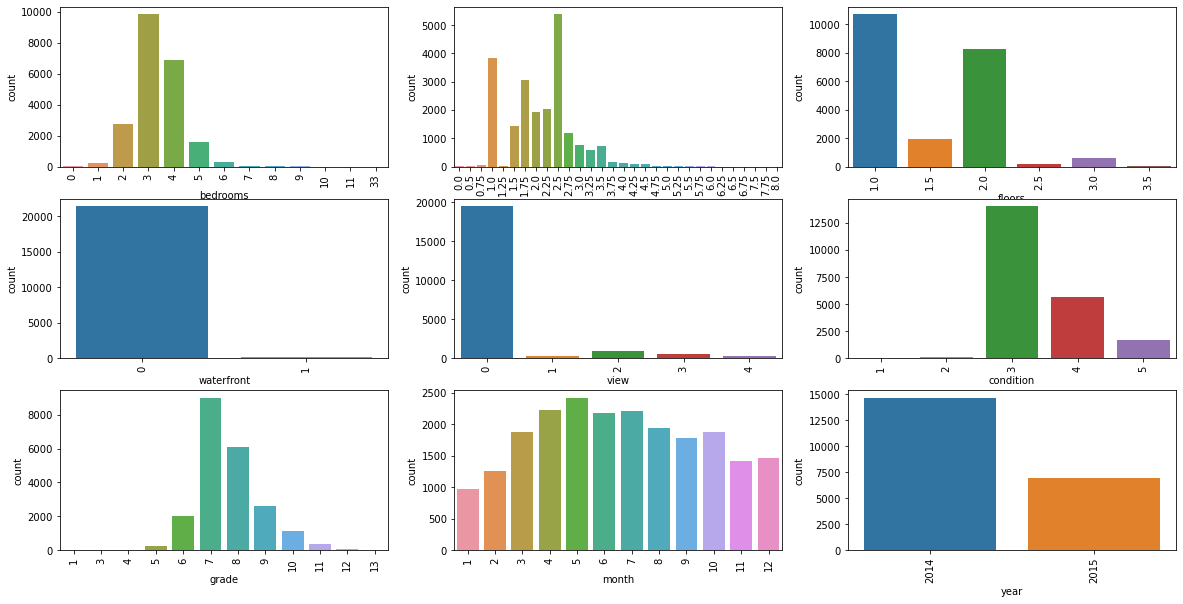

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sn.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

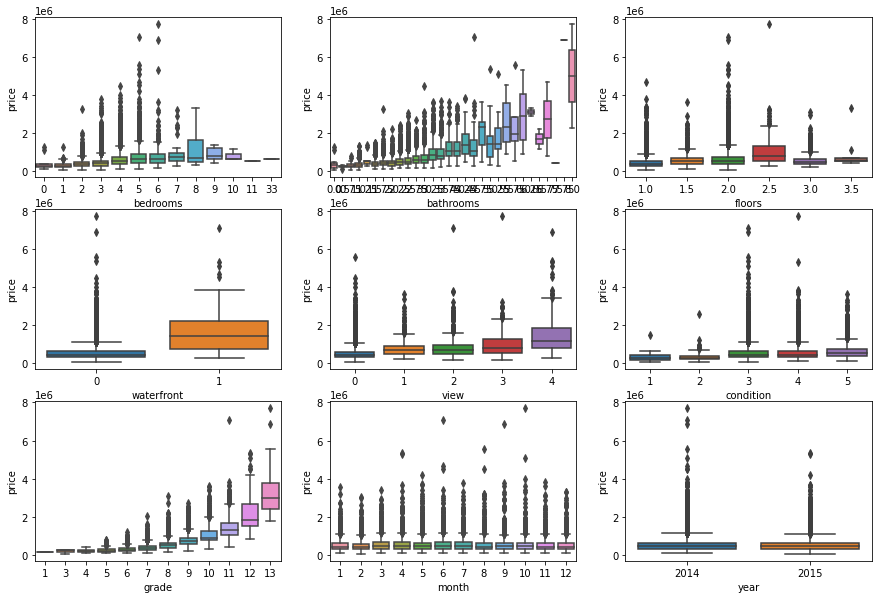

In [15]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
for var,subplot in zip(dscr_columns,ax.flatten()):
    sn.boxplot(x=var,y='price',data=df,ax=subplot)

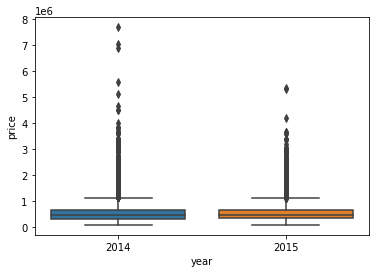

In [16]:
sn.boxplot(df['year'],df['price'])
plt.show()

In [17]:
cont_col=[u'sqft_living',u'sqft_lot',u'sqft_above',u'sqft_basement',u'yr_built',u'yr_renovated', u'zipcode',u'lat',u'long',u'sqft_living15',u'sqft_lot15']

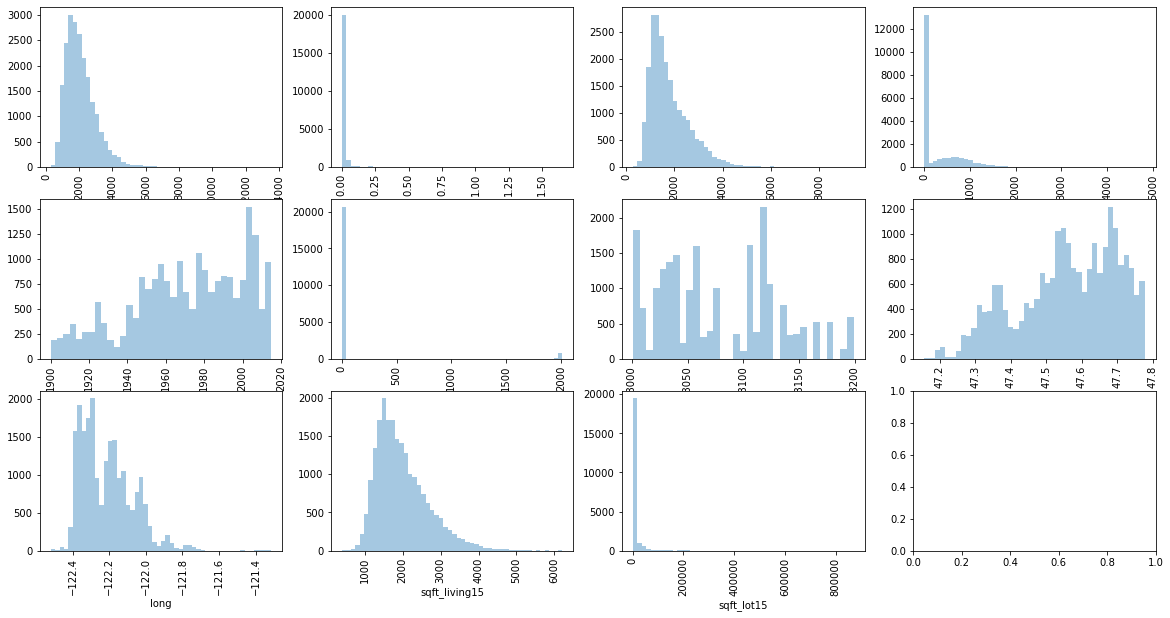

In [18]:
fig,ax=plt.subplots(3,4,figsize=(20,10))
for variable,subplot in zip(cont_col,ax.flatten()):
    sn.distplot(df[variable],ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

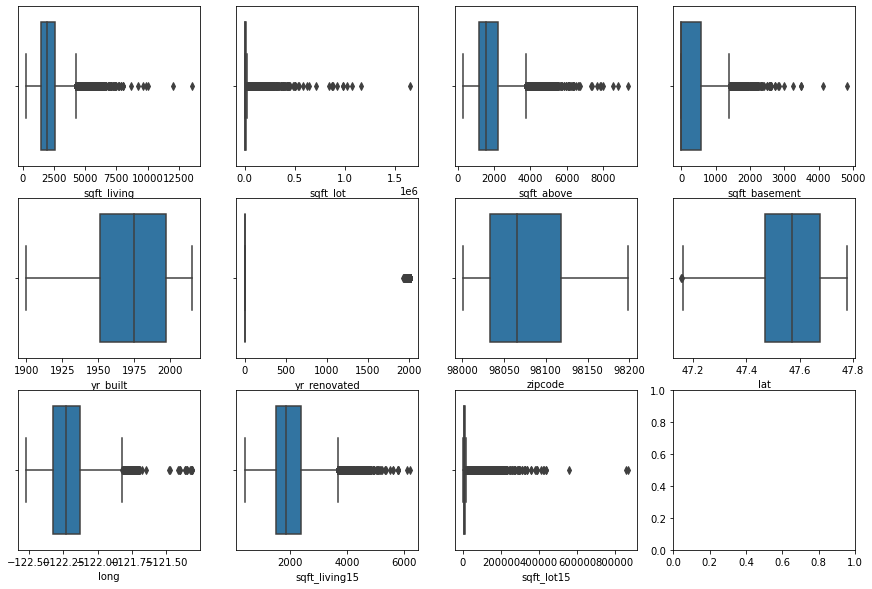

In [19]:
fig,ax=plt.subplots(3,4,figsize=(15,10))
for var,subplot in zip(cont_col,ax.flatten()):
    sn.boxplot(df[var],ax=subplot)

In [20]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
np.where(df['bedrooms']==33),np.where(df['bedrooms']==11)


((array([15870], dtype=int64),), (array([8757], dtype=int64),))

In [22]:
df.iloc[[15870,8757]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,8,2014


In [23]:
df=df.drop(df.index[15870])
df=df.drop(df.index[8757])
df.shape

(21611, 23)

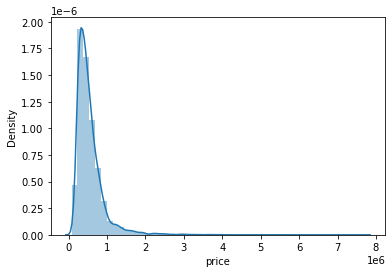

In [24]:
sn.distplot(df['price'])
plt.show()

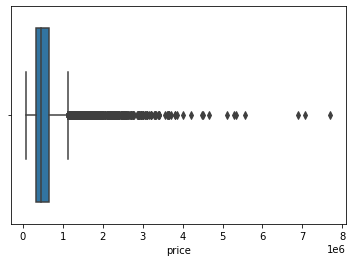

In [25]:
sn.boxplot(df['price'])
plt.show()

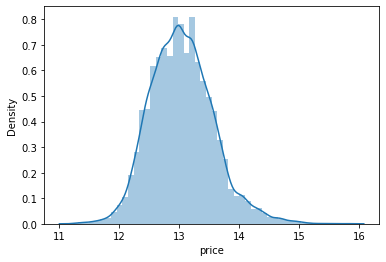

In [26]:
sn.distplot(np.log(df.price))
plt.show()

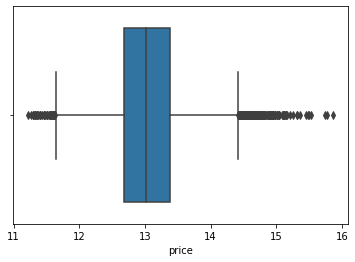

In [27]:
sn.boxplot(np.log(df.price))
plt.show()

####  Applying Regression Model

In [28]:
import statsmodels.api as sm

In [29]:
X=df.drop(['id','date','price'],axis=1)
y=df['price']

In [30]:
y=np.log(y)

In [31]:
x=sm.add_constant(X)

In [32]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3862.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:30:16   Log-Likelihood:                -803.59
No. Observations:               21611   AIC:                             1647.
Df Residuals:                   21591   BIC:                             1807.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -132.6295     12.436    -10.665      0.000    -157.004    -108.255
bedrooms         -0.0144      0.002     -5.839      0.000      -0.019      -0.010
bathrooms         0.0700      0.004     17.213      0.000       0.062       0.078
sqft_living    9.659e-05   2.85e-06     33.921      0.000     9.1e-05       0.000
sqft_lot       4.636e-07   5.98e-08      7.749      0.000    3.46e-07    5.81e-07
floors            0.0761      0.004     16.953      0.000       0.067       0.085
waterfront        0.3710      0.022     17.116      0.000       0.329       0.414
view              0.0597      0.003     22.330      0.000       0.054       0.065
condition         0.0650      0.003     22.090      0.000       0.059       0.071
grade             0.1591      0.003     59.147      0.000       0.154       0.164
sqft_above     4.056e-05   2.82e-06     14.401      0.000     3.5e-05    4.61e-05
sqft_basement  5.627e-05   3.31e-06     17.015      0.000    4.98e-05    6.28e-05
yr_built         -0.0034   9.07e-05    -37.626      0.000      -0.004      -0.003
yr_renovated   3.826e-05   4.57e-06      8.376      0.000    2.93e-05    4.72e-05
zipcode          -0.0006   4.12e-05    -15.707      0.000      -0.001      -0.001
lat               1.4039      0.013    104.708      0.000       1.378       1.430
long             -0.1585      0.016     -9.666      0.000      -0.191      -0.126
sqft_living15  9.885e-05    4.3e-06     22.962      0.000    9.04e-05       0.000
sqft_lot15    -2.605e-07   9.15e-08     -2.847      0.004    -4.4e-07   -8.12e-08
month             0.0023      0.001      2.623      0.009       0.001       0.004
year              0.0633      0.006     10.755      0.000       0.052       0.075
==============================================================================
Omnibus:                      387.607   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.214
Skew:                          -0.048   Prob(JB):                    2.55e-172
Kurtosis:                       3.932   Cond. No.                     9.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

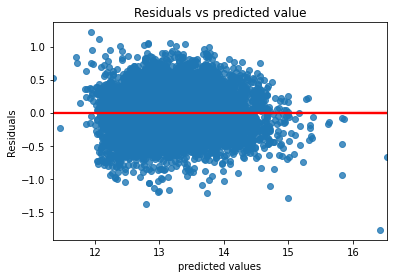

In [33]:
fitted_vals=model.predict()
resids=model.resid

sn.regplot(x=fitted_vals,y=resids,line_kws={'color':'red'})
plt.title('Residuals vs predicted value')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()


In [34]:
from scipy import stats

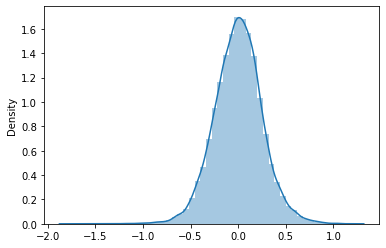

In [35]:
sn.distplot(model.resid)
plt.show()  
# residuals are normally distributed

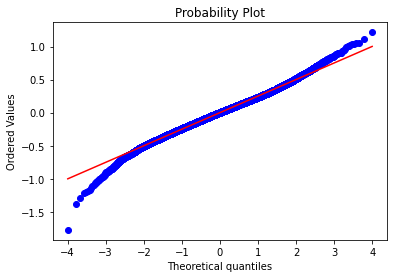

In [36]:
stats.probplot(resids,plot=sn.mpl.pyplot)
plt.show()
# residuals are normally distributed

In [37]:
resids_standardized=model.get_influence().resid_studentized_internal

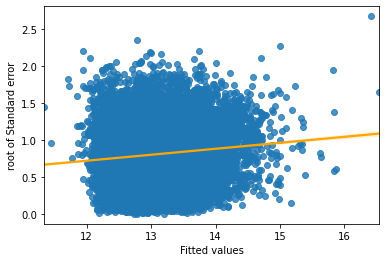

In [38]:
sn.regplot(x=fitted_vals,y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})
plt.xlabel('Fitted values')
plt.ylabel('root of Standard error')
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif1=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])
# remove the columns which has vif value greater than 10

,0
bedrooms,1.710074
bathrooms,3.362001
sqft_living,inf
sqft_lot,2.102780
floors,2.012528
waterfront,1.204138
view,1.436098
condition,1.253635
grade,3.423022
sqft_above,inf


In [41]:
X2=X.drop(['sqft_living','sqft_above','sqft_basement'],axis=1)
x1=sm.add_constant(X2)

In [42]:
model2=sm.OLS(y,x1)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4030.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:31:24   Log-Likelihood:                -1372.3
No. Observations:               21611   AIC:                             2781.
Df Residuals:                   21593   BIC:                             2924.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -137.4990     12.758    -10.778      0.000    -162.505    -112.493
bedrooms          0.0153      0.002      6.480      0.000       0.011       0.020
bathrooms         0.1281      0.004     34.051      0.000       0.121       0.135
sqft_lot       5.692e-07   6.13e-08      9.284      0.000    4.49e-07    6.89e-07
floors            0.0667      0.004     16.131      0.000       0.059       0.075
waterfront        0.3946      0.022     17.755      0.000       0.351       0.438
view              0.0664      0.003     24.585      0.000       0.061       0.072
condition         0.0669      0.003     22.228      0.000       0.061       0.073
grade             0.1917      0.003     75.529      0.000       0.187       0.197
yr_built         -0.0039    9.2e-05    -42.273      0.000      -0.004      -0.004
yr_renovated   3.928e-05   4.69e-06      8.376      0.000    3.01e-05    4.85e-05
zipcode          -0.0006   4.22e-05    -13.905      0.000      -0.001      -0.001
lat               1.3957      0.014    102.124      0.000       1.369       1.422
long             -0.1408      0.017     -8.504      0.000      -0.173      -0.108
sqft_living15     0.0002   4.05e-06     37.460      0.000       0.000       0.000
sqft_lot15    -1.003e-07   9.38e-08     -1.070      0.285   -2.84e-07    8.35e-08
month             0.0027      0.001      2.991      0.003       0.001       0.004
year              0.0644      0.006     10.659      0.000       0.053       0.076
==============================================================================
Omnibus:                      339.937   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.024
Skew:                           0.035   Prob(JB):                    1.06e-144
Kurtosis:                       3.855   Cond. No.                     7.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

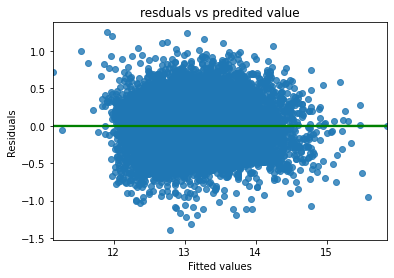

In [43]:
fitted_vals2=model2.predict()
resids2=model2.resid

sn.regplot(x=fitted_vals2,y=resids2,line_kws={'color':'green'})
plt.title('resduals vs predited value')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

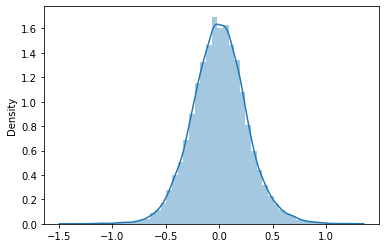

In [44]:
sn.distplot(model2.resid)
plt.show()
# residuals are normally distributed

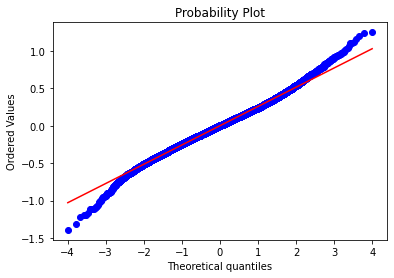

In [45]:
stats.probplot(resids2,plot=sn.mpl.pyplot)
plt.show()
# From normal probability plot the errors are normally distributed.

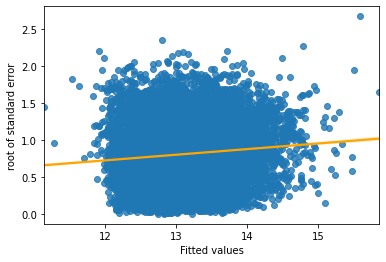

In [46]:
resids_standardized2=model2.get_influence().resid_studentized_internal
sn.regplot(x=fitted_vals2,y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})
plt.xlabel('Fitted values')
plt.ylabel('root of standard error')
plt.show()

In [47]:
vif2=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
pd.DataFrame({'vif':vif2[1:]},index=x1.columns[1:])
# all values of vif are less than 10

,vif
bedrooms,1.496166
bathrooms,2.727238
sqft_lot,2.094491
floors,1.617324
waterfront,1.201073
view,1.392093
condition,1.245371
grade,2.889992
yr_built,2.372479
yr_renovated,1.151167


In [56]:
from scipy.stats.stats import pearsonr

for column in x.columns:
    corr_test = pearsonr(x[column], model.resid)
    print(f'Variable: {column} \t correlation: {corr_test[0]:.4f}, \tp-value: {corr_test[1]:.4f}')

Variable: const 	 correlation: nan, 	p-value: nan
Variable: bedrooms 	 correlation: -0.0000, 	p-value: 1.0000
Variable: bathrooms 	 correlation: 0.0000, 	p-value: 1.0000
Variable: sqft_living 	 correlation: -0.0000, 	p-value: 1.0000
Variable: sqft_lot 	 correlation: -0.0000, 	p-value: 1.0000
Variable: floors 	 correlation: -0.0000, 	p-value: 1.0000
Variable: waterfront 	 correlation: 0.0000, 	p-value: 1.0000
Variable: view 	 correlation: 0.0000, 	p-value: 1.0000
Variable: condition 	 correlation: -0.0000, 	p-value: 1.0000
Variable: grade 	 correlation: 0.0000, 	p-value: 1.0000
Variable: sqft_above 	 correlation: -0.0000, 	p-value: 1.0000
Variable: sqft_basement 	 correlation: -0.0000, 	p-value: 1.0000
Variable: yr_built 	 correlation: 0.0000, 	p-value: 1.0000
Variable: yr_renovated 	 correlation: 0.0000, 	p-value: 1.0000
Variable: zipcode 	 correlation: 0.0000, 	p-value: 1.0000
Variable: lat 	 correlation: -0.0000, 	p-value: 1.0000
Variable: long 	 correlation: 0.0000, 	p-value: 1.0000

In [49]:
corr_test

(7.548697994810838e-13, 0.9999999999524566)

In [54]:
for column in x1.columns:
    corr_test=pearsonr(x[column],model2.resid)
    print(f'variable:{column}\tcorrelation:{corr_test[0]:.20f},\t p-value:{corr_test[1]:.4f}')

variable:const	correlation:nan,	 p-value:nan
variable:bedrooms	correlation:-0.00000000000039686657,	 p-value:1.0000
variable:bathrooms	correlation:0.00000000000029854938,	 p-value:1.0000
variable:sqft_lot	correlation:0.00000000000536716505,	 p-value:1.0000
variable:floors	correlation:-0.00000000000007495914,	 p-value:1.0000
variable:waterfront	correlation:0.00000000000007427045,	 p-value:1.0000
variable:view	correlation:0.00000000000026504536,	 p-value:1.0000
variable:condition	correlation:-0.00000000000018889057,	 p-value:1.0000
variable:grade	correlation:0.00000000000041455901,	 p-value:1.0000
variable:yr_built	correlation:0.00000000000029335909,	 p-value:1.0000
variable:yr_renovated	correlation:0.00000000000004948516,	 p-value:1.0000
variable:zipcode	correlation:-0.00000000000053619674,	 p-value:1.0000
variable:lat	correlation:-0.00000000000053558546,	 p-value:1.0000
variable:long	correlation:0.00000000000111353461,	 p-value:1.0000
variable:sqft_living15	correlation:0.00000000000029

In [53]:
corr_test

(7.85354772750782e-13, 0.9999999999470396)